# From Trust to Disagreement: disentangling the interplay of Misinformation and Polarisation in the News Ecosystem

Donald Ruggiero Lo Sardo<sup>a,b,c</sup>, Emanuele Brugnoli<sup>a,c</sup>, Vittorio Loreto<sup>a,b,c,d</sup>, and Pietro Gravino<sup>e,a,c</sup>

<sup>a</sup> Sony Computer Science Laboratories Rome, Joint Initiative CREF-SONY, Centro Ricerche Enrico Fermi, Via Panisperna 89/A, 00184, Rome, Italy; 

<sup>b</sup> Physics Department, Sapienza University of Rome, Piazzale Aldo Moro 2, 00185 Rome, Italy; cCentro Ricerche Enrico Fermi, Via Panisperna 89/A, 00184, Rome, Italy; 

<sup>d</sup>Complexity Science Hub Vienna, Josefstaedter Strasse 39, 1080, Vienna, Austria; e Sony Computer Science Laboratories Paris, 6, Rue Amyot, 75005, Paris, France


## Abstract

The increasing pervasiveness of fruitless disagreement poses a considerable risk to social cohesion and constructive public discourse. While polarised discussions can exhibit significant distrust in the news, it is still largely unclear whether disagreement is somehow linked to misinformation. In this work, we exploit the results of `Cartesio', an online experiment to rate the trustworthiness of Italian news articles annotated for reliability by expert evaluators. We developed a metric for disagreement that allows for correct comparisons between news with different mean trust values. Our findings indicate that, though misinformation receives lower trust ratings than accurate information, it does not appear to be more controversial. Additionally, we examined the relationship between these findings and Facebook user engagement with news article. Our results show that disagreement correlates with an increased likelihood of commenting, probably linked to inconclusive and long discussions. The emerging scenario is one in which fighting disinformation seems ineffective in countering polarisation. Disagreement focuses more on the divergence of opinions, trust, and their effects on social cohesion. This study offers a foundation for unsupervised news item analysis independent of expert annotation. Incorporating similar principles into the design of news distribution platforms and social media systems can enhance online interactions and foster the development of a less divisive news ecosystem.

## 1. Introduction

In today's digital environment, where every swipe presents a stream of headlines, understanding the trustworthiness of the news we consume has never been more important. Amid the vast expanse of information and opinions, one wonders: What factors truly influence our trust in news? Is it merely the accuracy of content, or are there underlying complexities at play?

Enter the "Cartesio" experiment. This study offers a measured look into Italian news from 09/01/2018 to 12/04/2020, examining public discourse and trust. Garnering insights from over 5,800 participants, "Cartesio" reached its audience through a combination of social media, science fair participations, and word-of-mouth. An interesting observation from the study is that while misinformation tends to receive lower trust scores, it doesn't necessarily generate more debates than conventional news.

Furthermore, the study introduces a metric for 'disagreement', designed for scenarios where opinions exhibit significant imbalances. For those interested in the mechanics behind these findings, this Medium article provides a more in-depth look. Readers are also invited to explore the underlying code and follow the steps in the associated notebook to better understand the methodology and data.

If you're keen on understanding the nuances of news trustworthiness and the factors influencing public discourse, this analysis offers a structured perspective. Let's delve into the findings and explore the broader implications for our digital news ecosystem.

## 2. Data Loading

### 2.1 Prerequisites

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns

In [2]:
fontsize=18

### 2.2 Load Data

In [3]:
responses = pd.read_csv('../Data/responses_users_cleaned.csv', index_col=0, dtype={'id':str,
                                                                                   'session_id':str,
                                                                                   'article_id':str,
                                                                                   'created_at':str,
                                                                                   'position':int,
                                                                                   'trust':'int',
                                                                                   'clicked_read_more_at':object})

In [4]:
articles = pd.read_csv('../Data/articles.csv', index_col=0)


## 3. Data Preprocessing
Describe any preprocessing steps such as normalization, handling missing values, etc.

In [5]:
df = responses[['user_id', 'article_id', 'trust']].merge(articles[['id', 'validated_fake']], how='left', left_on='article_id', right_on='id').rename(columns={'validated_fake':'Misinformation'}).replace({'Misinformation':0}, 'No').replace({'Misinformation':1}, 'Yes')
user_means = responses.groupby('user_id')['trust'].mean()

In [6]:
article_means = responses.groupby('article_id')['trust'].mean()

## 4. Analysis
### 4.1 [Analysis 1]
Describe the first analysis performed.

In [7]:
print(articles['created_at'].min())
print(articles['created_at'].max())

2018-01-08
2020-04-12


## 5. Results

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


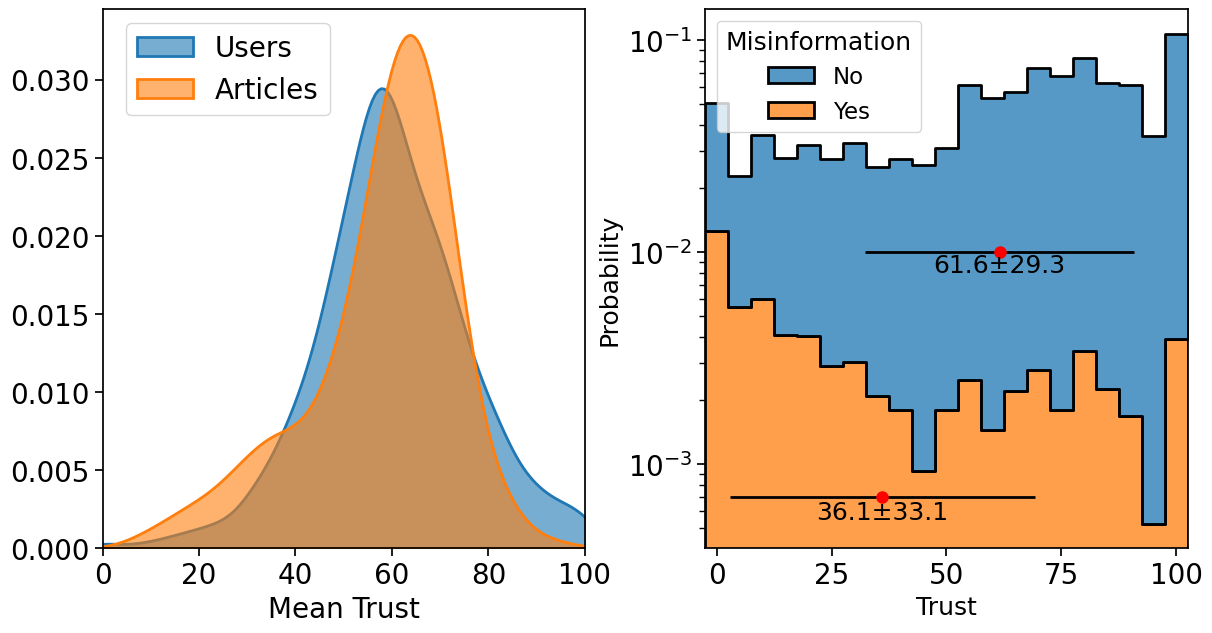

In [71]:
f, axs = plt.subplots(1,2, figsize=(14,7))

sns.set_context("notebook", font_scale=1.5) 

ax=axs[1]
bins = np.arange(-2.5, 103, 5)
sns.histplot(data=df, x='trust', bins=bins, hue='Misinformation', fill=True, stat='probability', element='step',lw=2, multiple='stack', common_norm=True)

mean_value = df[df['Misinformation']=='No']['trust'].mean()
std_deviation = df[df['Misinformation']=='No']['trust'].std()
plt.hlines(y=0.01, xmin=mean_value - std_deviation, xmax=mean_value + std_deviation, color='k', linewidth=2)
plt.plot(mean_value, 0.01, 'ro', markersize=8) 
ax.annotate('{:.1f}±{:.1f}'.format(mean_value, std_deviation), (mean_value, 0.0080), horizontalalignment='center', fontsize=18)

mean_value = df[df['Misinformation']=='Yes']['trust'].mean()
std_deviation = df[df['Misinformation']=='Yes']['trust'].std()
plt.hlines(y=0.0007, xmin=mean_value - std_deviation, xmax=mean_value + std_deviation, color='k', linewidth=2)
plt.plot(mean_value, 0.0007, 'ro', markersize=8) 
ax.annotate('{:.1f}±{:.1f}'.format(mean_value, std_deviation), (mean_value, 0.00055), horizontalalignment='center', fontsize='18')
# sns.boxplot(x='trust', data=df, orient='h', showmeans=True, ax=ax)
plt.xlim([-2.5,102.5])
ax.set_yscale('log')
ax.set_xlabel('Trust', fontsize=18)
ax.set_ylabel('Probability', fontsize=18)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

sns.move_legend(ax, "upper left")
# # Get the current legend
# legend = ax.get_legend()

# # Set the font size for each text in the legend
# for text in legend.get_texts():
#     text.set_fontsize(fontsize)

# legend.get_title().set_fontsize(fontsize-3)

# for patch in legend.get_patches():
#     patch.set_height(15)  # Set the height
#     patch.set_width(40)   # Set the width


ax=axs[0]

sns.kdeplot(data = user_means, fill=True, ax=ax,lw=2, label='Users', alpha=0.6)
sns.kdeplot(data = article_means, fill=True, ax=ax,lw=2, label='Articles', alpha=0.6)
ax.legend(bbox_to_anchor=(0.5, 1), ncols=1, fontsize=fontsize)
ax.set_xlabel('Mean Trust', fontsize=fontsize)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

ax.set_ylabel('', fontsize=fontsize)
ax.set_xlim([0,100])



# axins = inset_axes(ax, width=2.5, height=1.7, loc=2)


# axins.set_yticks([])


# sns.histplot(data = user_means, fill=True, ax=axins, kde=False, color='black',element='step',lw=2)
# sns.histplot(data = user_means, fill=False, ax=axins, kde=True, color='black')

# axins.set_xlabel('User Mean Trust', fontsize=16)

# plt.legend(loc='upper left')

# sns.despine()
plt.subplots_adjust(wspace=0.25)

plt.savefig('../Figures/Fig1-dataAnal.png', bbox_inches='tight', transparent=True, dpi=300)
plt.savefig('../Figures/Fig1-dataAnal.eps', bbox_inches='tight', format='eps')

In [72]:
print(user_means.mean(), user_means.std())

59.888339377651775 15.642761658241723


In [73]:
import scipy
responses['mean_trust'] = responses.groupby('article_id')['trust'].transform(np.mean)
responses['bin_mean_trust'] = pd.cut(responses['mean_trust'], 10)
bins_mt = responses.sort_values(by='bin_mean_trust')['bin_mean_trust'].unique()
bins=np.linspace(0,100, 21)
div_data_list = []
for bin in bins_mt:
    bin_hist, _ = np.histogram(responses[responses['bin_mean_trust'] == bin]['trust'], bins=bins, density=True)
    div_data_list.append(bin_hist)
div_data = np.vstack(div_data_list)
mid_points = [np.round(iv.mid) for iv in bins_mt]
plot_data = {}
plot_data['x'] = np.linspace(0,10, 30)
plot_data['y'] = np.linspace(0,100,60)
plot_data['z'] = scipy.ndimage.zoom(div_data.T, 3)
plot_data['mid_points'] = mid_points

In [74]:
line_add = responses.groupby('article_id')['trust'].agg(['mean', 'std'])
line_add['bin_min_trust'] = pd.cut(line_add['mean'], 30, labels=np.linspace(0,10,30))

In [75]:
t = line_add.groupby('bin_min_trust')['std'].agg(['mean', 'std']).reset_index()
t=t.dropna()

/var/folders/tw/qfrh4tjj1sq9_3xp__m5ylbh0000gn/T/ipykernel_14727/1027181737.py:19: RuntimeWarning: invalid value encountered in log
  CS = ax1.contourf(plot_data['x'], plot_data['y'], np.log(plot_data['z']/plot_data['z'].sum()), 10, cmap='Spectral_r')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


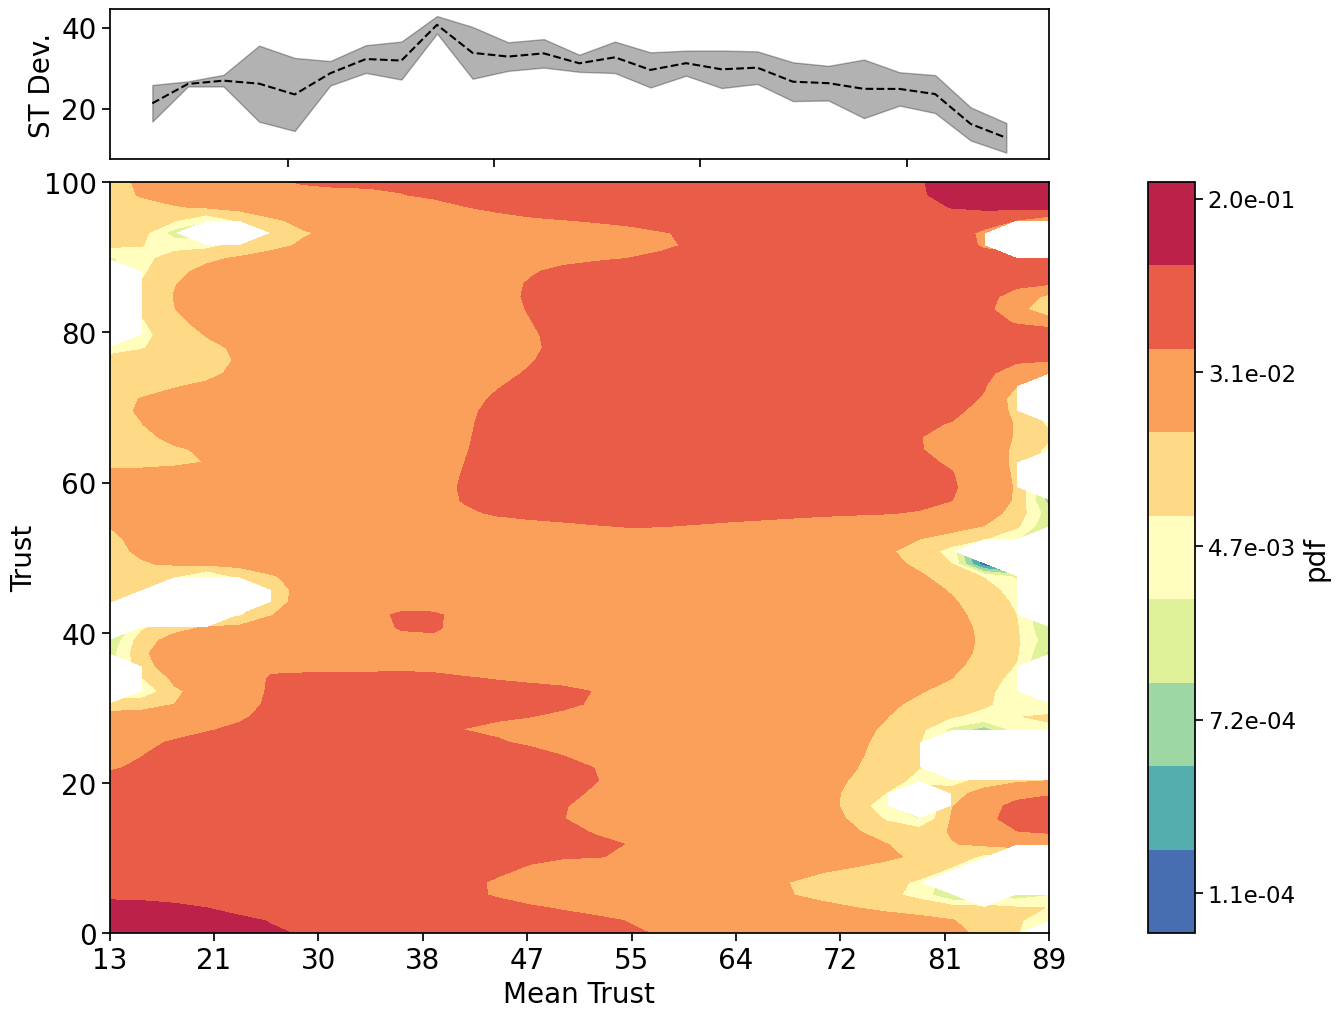

In [86]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(14,12))
fontsize = 20

# Define the grid layout
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 0.05], height_ratios=[1, 5])

# Add the line plot to the top grid
ax0 = plt.subplot(gs[0])
ax0.fill_between(t['bin_min_trust'], t['mean']-t['std'], t['mean']+t['std'], color='k', label='Standard Deviation', alpha=0.3)
ax0.plot(t['bin_min_trust'], t['mean'], color='k', ls='--')
ax0.tick_params(axis='x', labelsize=fontsize)
ax0.tick_params(axis='y', labelsize=fontsize)
ax0.set_xticklabels([])
ax0.set_ylabel('ST Dev.', fontsize=fontsize)

# Add the heatmap to the bottom grid
ax1 = plt.subplot(gs[2])
CS = ax1.contourf(plot_data['x'], plot_data['y'], np.log(plot_data['z']/plot_data['z'].sum()), 10, cmap='Spectral_r')
ax1.set_xticks(np.linspace(0,10,10))
ax1.set_xticklabels(np.array(plot_data['mid_points']).astype(int).astype(str))
ax1.tick_params(axis='x', labelsize=fontsize)
ax1.tick_params(axis='y', labelsize=fontsize)
ax1.set_xlabel('Mean Trust', fontsize=fontsize)
ax1.set_ylabel('Trust', fontsize=fontsize)

# Add the colorbar to the right of the heatmap
cbar = fig.colorbar(CS, ticks=np.linspace(-20.4, -4.8, 6), cax=plt.subplot(gs[3]))
cbar.ax.set_yticklabels(["{:.1e}".format(x) for x in np.exp(np.linspace(-11, -1.6, 6))])
cbar.ax.set_ylabel('pdf', fontsize=fontsize)

fig.subplots_adjust(hspace=0.05)
plt.savefig('../Figures/valley.png', bbox_inches='tight', transparent=True, dpi=300)
plt.savefig('../Figures/valley.eps', bbox_inches='tight', format='eps')

In [87]:
from scipy.stats import beta

alpha_fit, beta_fit, _, _ = beta.fit(df.trust)
disar = []
for i in range(10000):
    example = np.random.randint(0, 100, 17175)
    mu2 = example.mean()
    sigma2 = example.std()
    disar.append(np.sqrt(sigma2 * sigma2 / (mu2 * (100 - mu2))))
disar = np.array(disar)
disar2 = []
for i in range(10000):
    example = np.random.beta(alpha_fit, beta_fit, size=17175) * 100
    mu2 = example.mean()
    sigma2 = example.std()
    disar2.append(np.sqrt(sigma2 * sigma2 / (mu2 * (100 - mu2))))
disar2 = np.array(disar2)
p, bins = np.histogram(df['trust'], bins=np.arange(-2.5, 103, 5), density=True)
p = p * 5
disar3 = []
for i in range(10000):
    example = np.random.choice(np.arange(0, 101, 5), size=17175, replace=True, p=p)
    mu2 = example.mean()
    sigma2 = example.std()
    disar3.append(np.sqrt(sigma2 * sigma2 / (mu2 * (100 - mu2))))
disar3 = np.array(disar3)
mu = df['trust'].mean()
sigma = df['trust'].std()
GLOBAL_DISAGREEMENT = np.sqrt(sigma * sigma / (mu * (100 - mu)))

In [88]:
RTPanel = {}
RTPanel['UniformEx'] = np.random.randint(0, 100, 17299)
RTPanel['BetaEx'] = np.random.beta(alpha_fit, beta_fit, size=17299) * 100
RTPanel['SampleEX'] = np.random.choice(np.arange(0, 101, 5), size=17299, replace=True, p=p)
RTPanel['DataDF'] = df
RTPanel['DisagUniDist'] = disar
RTPanel['DisagBetaDist'] = disar2
RTPanel['DisagSampleDist'] = disar3
RTPanel['GlobalDisag'] = GLOBAL_DISAGREEMENT

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


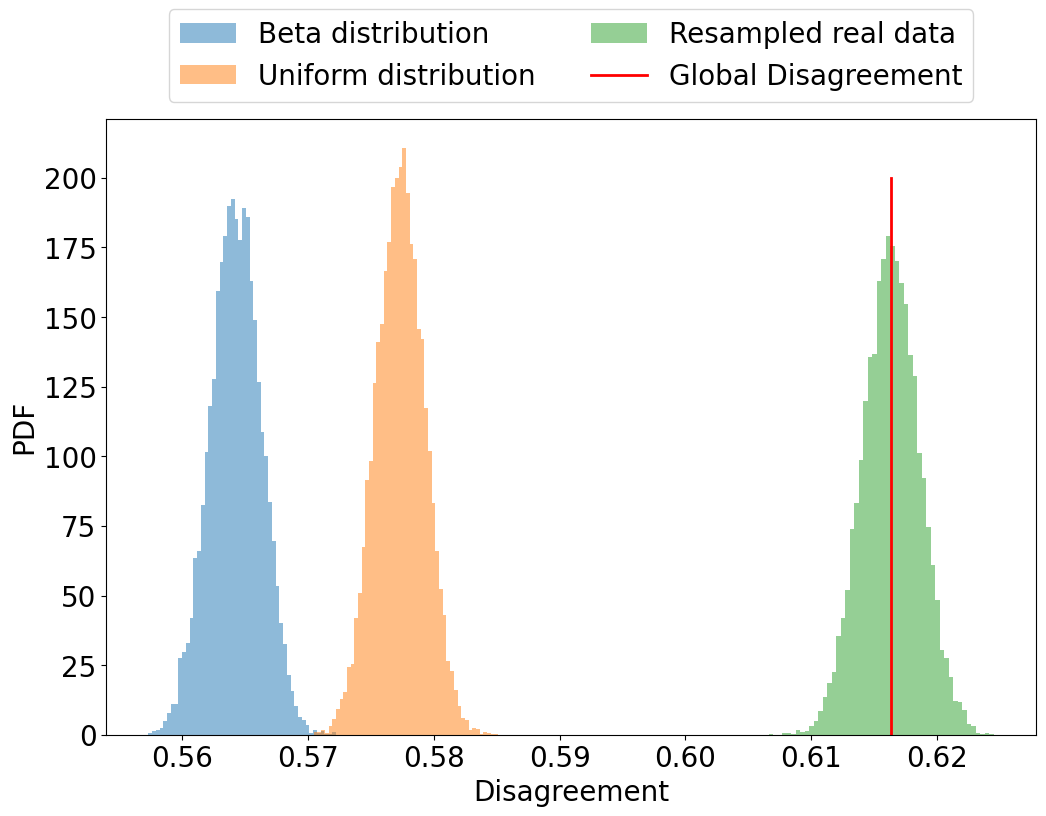

In [20]:
f, axs = plt.subplots(figsize=(12,8))
example = RTPanel['UniformEx']
# ax = axs[0]
# df = RTPanel['DataDF']
# ax.hist(df['trust'], bins=20, color='red', label = 'Cartesio data', linewidth=2)
# ax.hist(example, bins=np.arange(0,101,5), alpha=0.5, label='Uniform distribution', fill=False, histtype='step', linewidth=2)
# example = RTPanel['BetaEx']
# ax.hist(example, bins=np.arange(0,101,5), alpha=0.5, label='Beta distribution', fill=False, histtype='step', linewidth=2)
# example = RTPanel['SampleEX']
# ax.hist(example, bins=np.arange(0,101,5), alpha=0.5, label='Resampled real data', fill=False , histtype='step', linewidth=2)
# ax.set_xlabel('Trust', fontsize=fontsize)
# ax.set_ylabel('Counts', fontsize=fontsize)
# ax.legend(fontsize=14, loc='upper left')

ax = axs

ax.hist(RTPanel['DisagBetaDist'], density=True, bins=50, linewidth=0, label='Beta distribution', alpha=0.5)
ax.hist(RTPanel['DisagUniDist'], density=True, bins=50, linewidth=0, label='Uniform distribution', alpha=0.5)
ax.hist(RTPanel['DisagSampleDist'] , density=True, bins=50, linewidth=0, label='Resampled real data', alpha=0.5)

ax.plot([RTPanel['GlobalDisag'], RTPanel['GlobalDisag']], [0,200], c='red', label='Global Disagreement', linewidth=2)
ax.set_xlabel('Disagreement', fontsize=fontsize)
ax.set_ylabel('PDF', fontsize=fontsize)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncols=2, fontsize=fontsize)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

plt.savefig('../Figures/SyntheticDisag.png', bbox_inches='tight', transparent=True, dpi=300)
plt.savefig('../Figures/SyntheticDisag.eps', bbox_inches='tight', format='eps')

In [89]:
art_info = df.groupby('article_id').agg({'trust':['max', 'min', 'mean', 'std']})
art_info.columns = [x+'_trust' for x in art_info.columns.get_level_values(1)]
art_info['max_std'] = np.sqrt(((100-art_info['mean_trust'])*art_info['mean_trust']))
art_info['disagreement'] = art_info['std_trust']/art_info['max_std']
art_info.loc[art_info['disagreement'] == np.inf, 'disagreement'] = 0
art_info['interval'] = pd.cut(art_info['mean_trust'], bins=np.arange(0,101,10))
art_info  = art_info.merge(articles[['id', 'validated_fake']], how='left', left_on='article_id', right_on='id')
art_info['x'] = art_info['interval'].apply(lambda x: x.mid)


In [90]:
art_info_longform = art_info[['disagreement', 'x', 'validated_fake', 'id']].melt(id_vars=['x', 'id', 'validated_fake'])

In [91]:
temp = art_info_longform.groupby(['x','validated_fake'])['value'].agg(['mean', 'std', 'count'])
temp['std_mean'] = temp['std']/np.sqrt(temp['count'])
temp.reset_index(inplace=True)

In [92]:
plot_data2 = {}
trues = temp[temp['validated_fake']==0]
fakes = temp[temp['validated_fake']==1]
all_ = art_info_longform.groupby('x')['value'].agg(['mean', 'std', 'count']).reset_index()
plot_data2['all_line'] = all_
plot_data2['validated_fake_line'] = fakes
plot_data2['Others_line'] = trues
trues = art_info[art_info['validated_fake']==0]
fakes = art_info[art_info['validated_fake']==1]
plot_data2['validated_fake_points'] = trues
plot_data2['Others_points'] = fakes

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


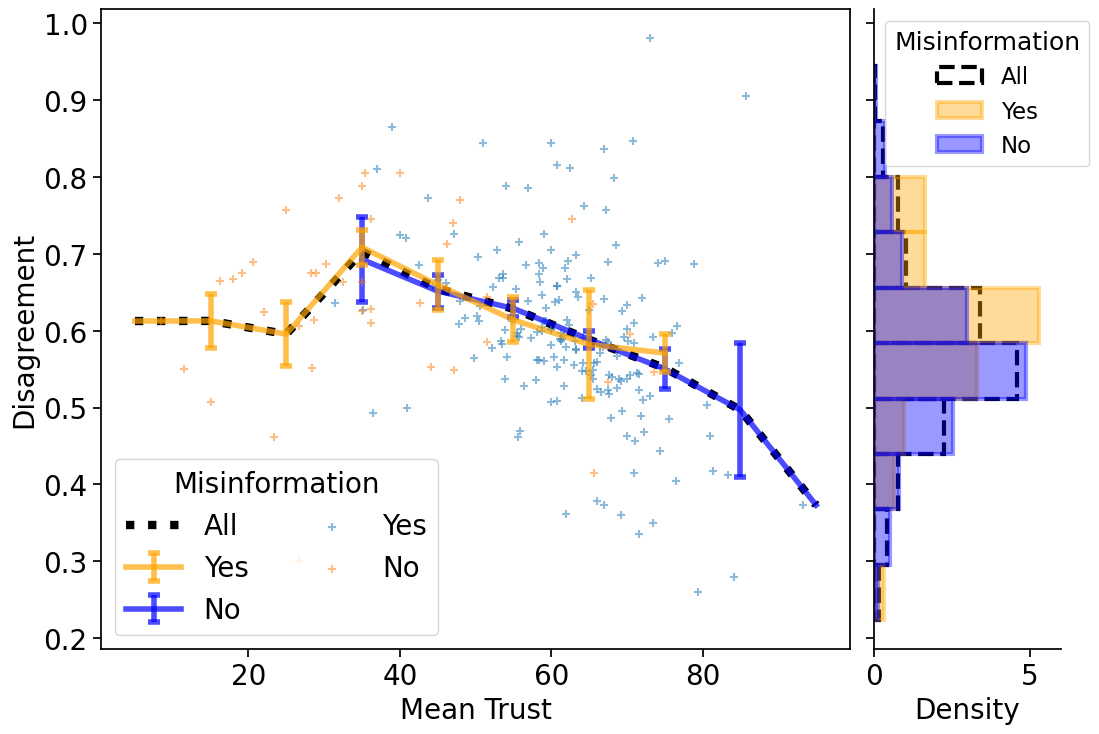

In [93]:
fig = plt.figure(figsize=(12,8))
gs = fig.add_gridspec(1, 2,  width_ratios=(4, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[0])
# ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1], sharey=ax)

la, = ax.plot(plot_data2['all_line']['x'], plot_data2['all_line']['mean'], ls=':', lw=6, zorder=0, color='k', label='all')
em = ax.errorbar(plot_data2['validated_fake_line']['x'],
             plot_data2['validated_fake_line']['mean'],
             plot_data2['validated_fake_line']['std_mean'],
             elinewidth=4, capsize=4, mew=4, lw=4, zorder=2, alpha=0.7, label= 'Yes', color='orange')
et = ax.errorbar(plot_data2['Others_line']['x'],
             plot_data2['Others_line']['mean'],
             plot_data2['Others_line']['std_mean'],
             elinewidth=4, capsize=4, mew=4, lw=4, zorder=1, alpha=0.7, label='No', color='blue')

sm = ax.scatter(plot_data2['validated_fake_points'] ['mean_trust'],
            plot_data2['validated_fake_points'] ['disagreement'],
            marker = '+', alpha=0.5, label='Yes')
st = ax.scatter(plot_data2['Others_points']['mean_trust'],
            plot_data2['Others_points']['disagreement'],
            marker = '+', alpha=0.5, label='No')
ax.set_xlabel('Mean Trust', fontsize=fontsize)
ax.set_ylabel('Disagreement', fontsize=fontsize)
legend=ax.legend(handles=[la, em, et, sm, st], labels=['All', 'Yes', 'No', 'Yes', 'No'], ncol=2,fontsize=fontsize, title='Misinformation')
plt.setp(legend.get_title(),fontsize=fontsize)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

# ax_histx.bar(plot_data2['all_line']['x'], plot_data2['all_line']['count'], width=10, alpha=0.7)
# ax_histx.spines[['right', 'top']].set_visible(False)
# ax_histx.tick_params(labelbottom=False)
# ax_histx.tick_params(axis='y', labelsize=fontsize)
# ax_histx.set_ylabel('Count', fontsize=fontsize)
# plt.setp(ax_histx.get_xticklabels(), visible=False)

counts, bins=np.histogram(art_info['disagreement'], density=True)
ax_histy.barh(bins[:-1], counts, height=bins[1]-bins[0], alpha=1, fill=False, lw=3, ls='--', label='All')
counts, bins=np.histogram(art_info[art_info['validated_fake']==1]['disagreement'], bins=bins, density=True)
ax_histy.barh(bins[:-1], counts, height=bins[1]-bins[0], alpha=0.4, edgecolor='orange', lw=3, color='orange', label='Yes')
counts, bins=np.histogram(art_info[art_info['validated_fake']==0]['disagreement'], bins=bins, density=True)
ax_histy.barh(bins[:-1], counts, height=bins[1]-bins[0], alpha=0.4, edgecolor='blue', lw=3, color='blue', label='No')
ax_histy.set_xlim([0, 6])
ax_histy.spines[[ 'right', 'top']].set_visible(False)
ax_histy.tick_params(labelleft=False)
ax_histy.set_xlabel('Density', fontsize=fontsize)
ax_histy.tick_params(axis='x', labelsize=fontsize)
ax_histy.legend(title='Misinformation')


plt.savefig('../Figures/Fig3_disag.png', bbox_inches='tight', dpi=300, transparent=True)
plt.savefig('../Figures/Fig3_disag.eps', bbox_inches='tight', format='eps')


## 6. Discussion

In the present study, we sought to elucidate the underlying mechanisms of [topic/phenomenon]. Our findings provide a novel perspective on the intricate interplay between [X] and [Y], shedding light on several previously unexplored aspects.

Our primary observation of [specific finding] corroborates earlier work by Smith et al. (2015), yet contrasts with the results presented by Johnson and Lee (2018). This discrepancy could be attributed to differences in experimental design, sample populations, or analytical techniques. It underscores the complexity of [topic/phenomenon] and the importance of contextual nuances.

Interestingly, our secondary analysis revealed [another specific finding], a pattern not reported in prior studies. This could signify a potential new avenue of research, warranting further in-depth investigation. The implications of this are manifold, with potential applications in [relevant field or industry].

However, our study is not without limitations. The sample size was relatively modest, which might affect the generalizability of our results. Additionally, the cross-sectional nature of our research design precludes any definitive conclusions about causality. Future research employing longitudinal or experimental designs would be instrumental in establishing cause-and-effect relationships.

In conclusion, while our findings offer valuable insights into [topic/phenomenon], they also underscore the multifaceted nature of the subject. We advocate for a holistic approach, integrating various methodologies and perspectives, to gain a more comprehensive understanding. As the field continues to evolve, collaborative and interdisciplinary efforts will be paramount in unraveling the intricacies of [topic/phenomenon].

## 7. Conclusion
Summarize the main findings of the paper and their significance.

## 8. Reproducibility
### 8.1 Requirements
List of software, libraries, and versions used in the analysis.

### 8.2 Data Availability
Provide information on how to access the data used in the analysis. If the data is proprietary or confidential, mention the restrictions.

## 9. Acknowledgements
Acknowledge any funding sources, collaborators, or other relevant parties.

## 10. References
List all references cited in the notebook.


You can adapt this template to your specific needs, and expand on each section as required. Make sure to provide all necessary information for readers to understand and reproduce the analyses. If the paper involves complex systems or specific tools from physics and mathematics, consider adding dedicated sections or appendices that go into more detail about the methodologies used.






In [39]:
art_info['validated_fake'].value_counts()

0    185
1     42
Name: validated_fake, dtype: int64

In [ ]:
R = responses[['article_id', 'user_id', 'trust']].pivot(index='article_id', columns='user_id', values='trust').values.T

In [ ]:
def jaccard_sim(u, v):
    return np.nansum(np.minimum(u,v))/np.nansum(np.maximum(u,v))

In [ ]:
n_articles = art_info.shape[0]
J = np.empty((n_articles,n_articles))
for i in range(n_articles):
    for j in range(i,n_articles):
        J[i,j] = jaccard_sim(R[:,i], R[:,j])
        J[j,i] = J[i,j]

/var/folders/tw/qfrh4tjj1sq9_3xp__m5ylbh0000gn/T/ipykernel_14727/3134567361.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return np.nansum(np.minimum(u,v))/np.nansum(np.maximum(u,v))


In [ ]:
J_ = J.copy()
J_[np.isnan(J_)] = 0
J_dist = 1-J_

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
X_embedded = TSNE(n_components=2).fit_transform(J_dist)

In [ ]:
art_info['x_jac'] = X_embedded[:,0]
art_info['y_jac'] = X_embedded[:,1]

In [ ]:
art_info = art_info.merge(articles[['id', 'source']], how='left', left_on='id', right_on='id')

In [ ]:
art_info['mean_trust'].describe()

count    227.000000
mean      57.719183
std       15.111606
min        8.421053
25%       51.273810
50%       60.833333
75%       67.586885
max       93.333333
Name: mean_trust, dtype: float64

<Axes: xlabel='x_jac', ylabel='y_jac'>

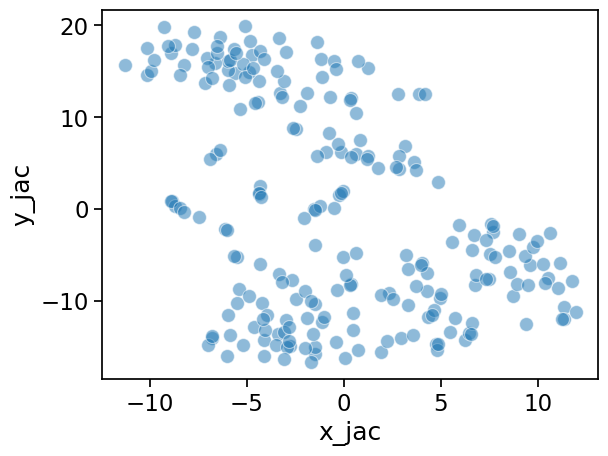

In [104]:
sns.scatterplot(x='x_jac', y='y_jac', data=art_info,  s=100, alpha=0.5)